This notebook is used to extract and compare mutations weights from NN architectures with one and two neurons in the first layer.

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
%run 'Functions.ipynb'

In [4]:
chunks = [('S'+str(x)) for x in range(1,13)]
true = {}
predicted = {}
fitness_potential = {}
hist = {}

large_weights_1 = {}
large_weights_2 = {}
large_weights_3 = {}

large_biases_1 = {}
large_biases_2 = {}
large_biases_3 = {}

uni_weights = {}
uni_biases = {}

# 0. Testing S7

In [15]:
chunk = 'S7'

data, labels = read_data(chunk)
    
model = Sequential()
init = initializers.Orthogonal(gain=1.0, seed=None)

model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer=opt,
              loss='mean_squared_error',
              verbose=0)

hist[chunk] = model.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
proba = model.predict_proba(data, batch_size=500, verbose=0)

uni_weights[chunk] = model.layers[0].get_weights()[0]
uni_biases[chunk] = model.layers[0].get_weights()[1]


true[chunk] = labels
predicted[chunk] = proba.flatten()
fitness_potential[chunk] = data.dot(uni_weights[chunk]) + uni_biases[chunk][0]

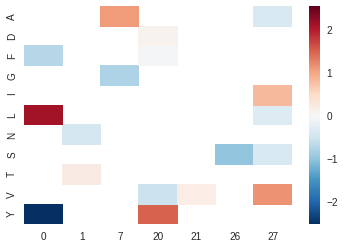

In [16]:
sns.heatmap(make_table(chunk))

In [17]:
make_table('S7')

0        1         7         20        21        26        27
A       NaN      NaN  1.075087       NaN       NaN       NaN -0.410419
D       NaN      NaN       NaN  0.080321       NaN       NaN       NaN
F -0.719696      NaN       NaN -0.053329       NaN       NaN       NaN
G       NaN      NaN -0.775172       NaN       NaN       NaN       NaN
I       NaN      NaN       NaN       NaN       NaN       NaN  0.817136
L  2.125791      NaN       NaN       NaN       NaN       NaN -0.346477
N       NaN -0.45261       NaN       NaN       NaN       NaN       NaN
S       NaN      NaN       NaN       NaN       NaN -0.988918 -0.407671
T       NaN  0.20357       NaN       NaN       NaN       NaN       NaN
V       NaN      NaN       NaN -0.535016  0.189475       NaN  1.127560
Y -2.522457      NaN       NaN  1.480063       NaN       NaN       NaN

# 1. 1-neuron

### 1.1. Training a NN with 1 neuron in the first layer

In [401]:
for chunk in chunks:
    
    print (chunk)
    data, labels = read_data(chunk)
    
    model = Sequential()
    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(1, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)
    
    hist[chunk] = model.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba = model.predict_proba(data, batch_size=500, verbose=0)
    
    uni_weights[chunk] = model.layers[0].get_weights()[0]
    uni_biases[chunk] = model.layers[0].get_weights()[1]

    
    true[chunk] = labels
    predicted[chunk] = proba.flatten()
    fitness_potential[chunk] = data.dot(uni_weights[chunk]) + uni_biases[chunk][0]

S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12


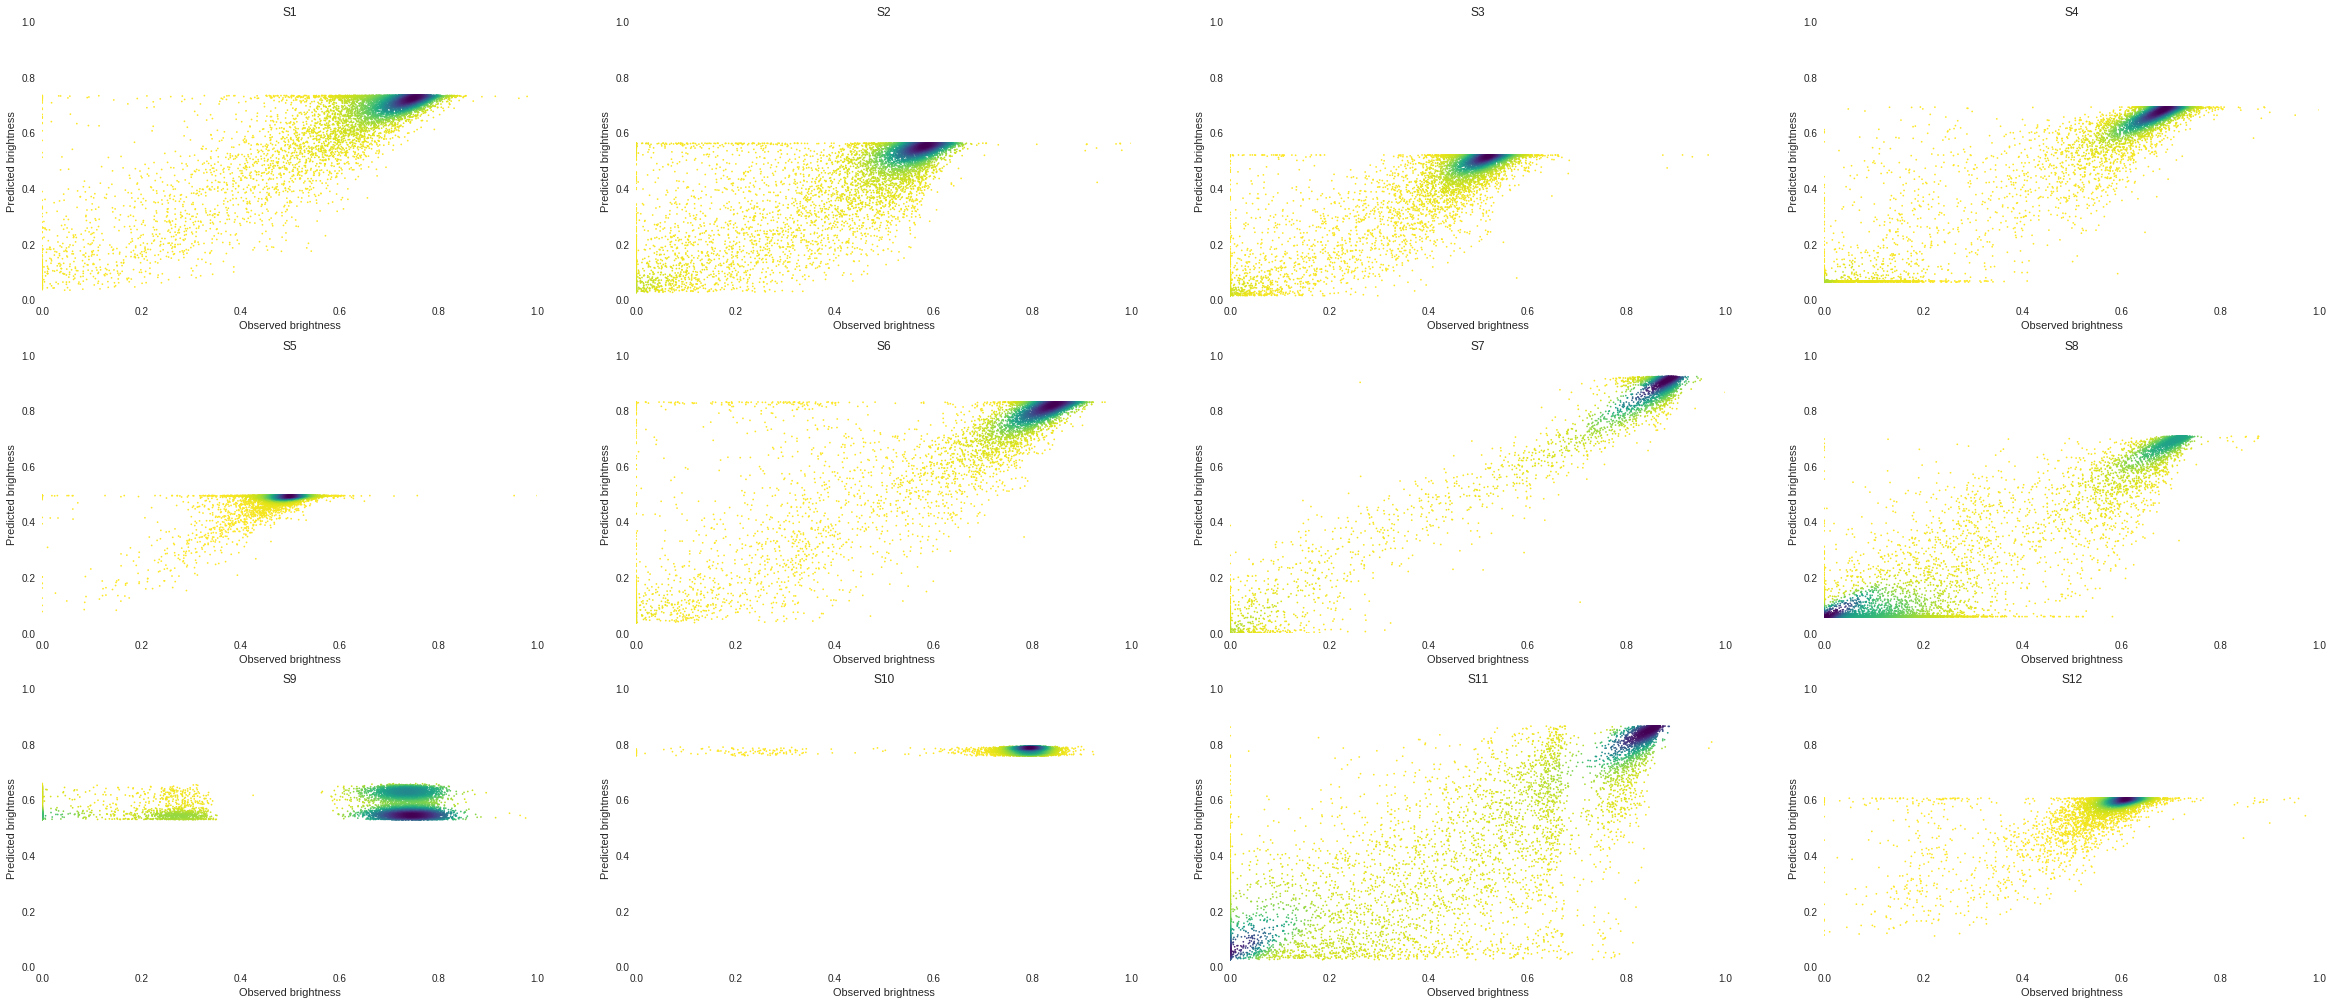

In [402]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.ylim(0,1)
    plt.xlim(0,1)
    density_plot(true[chunk][:10000], predicted[chunk][:10000])
    count+=1

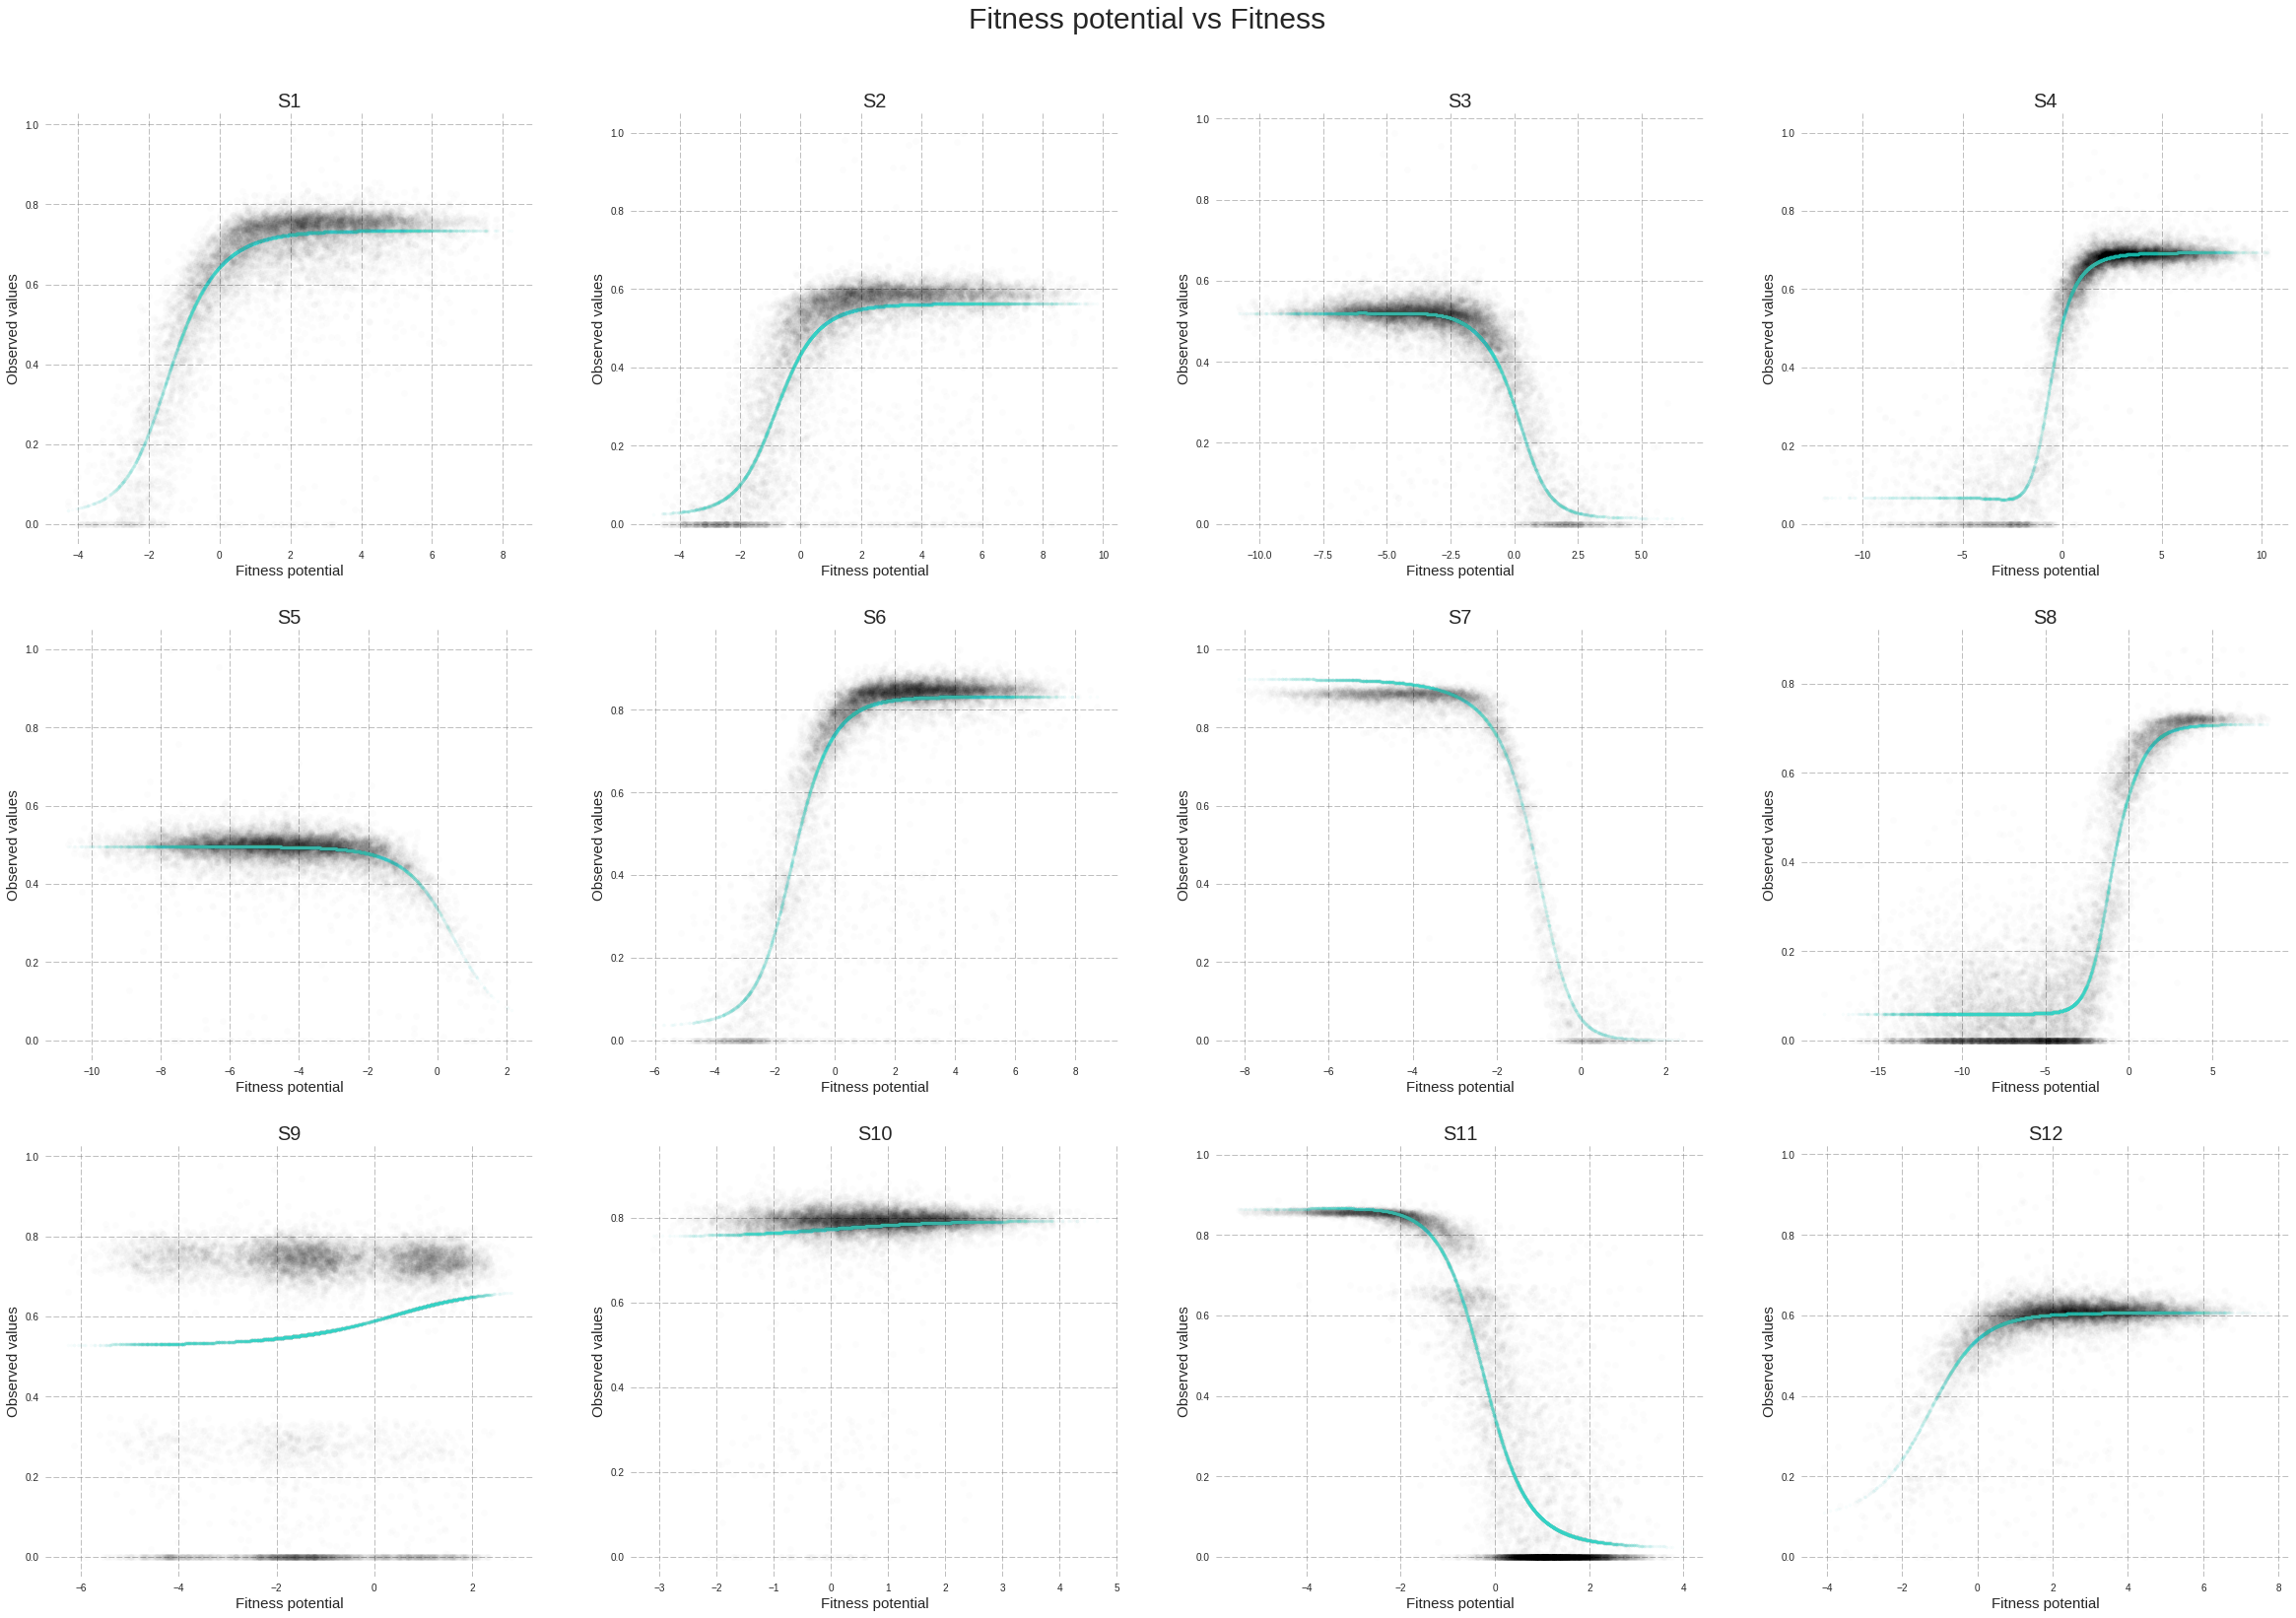

In [413]:
fitness_potential_plotting(0)

### 1.2. Checking correlations between observed and predicted data

In [404]:
r_values = []

for chunk in chunks:
    y = true[chunk]
    y_pred = predicted[chunk]
    slope, intercept, r_value, p_value, std_err = stats.linregress(y,y_pred)
    r_values.append(r_value)
    
lucas = [0.71, 0.6, 0.74, 0.91, 0.39, 0.06, 0.96, 0.77, 0.00, 0.00, 0.78, 0.58]

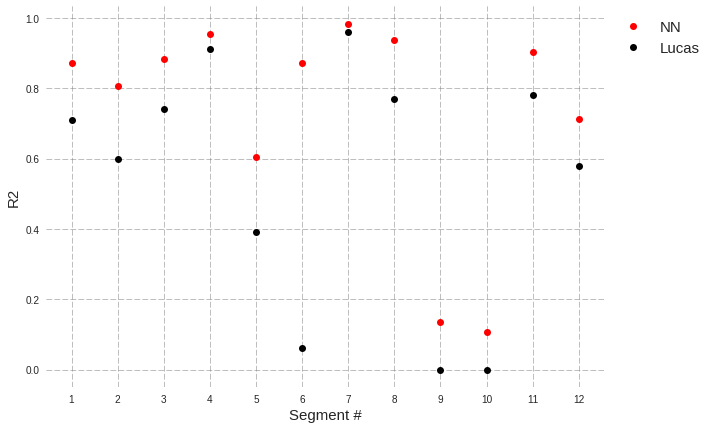

In [409]:
plt.figure(figsize=[10,7])
plt.plot([x for x in range(1, 13)], r_values, 'or', label='NN')
plt.plot([x for x in range(1, 13)], lucas, 'ok', label='Lucas')
plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')
plt.xlabel('Segment #', fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1, 1), loc='left')
plt.ylabel('R2', fontsize=15)
plt.xticks([x for x in range(1,13)]);

### 1.3. Extracting and visualizing weights

In [12]:
def make_table(chunk, neuron=0):
    
    index = set([x[-1] for x in unique_mutations[chunk]]) # creating dummy df
    columns = set([int(x[:-1]) for x in unique_mutations[chunk]])
    df = pd.DataFrame(index=sorted(index), columns=columns).astype(float)
    
    for i in range(len(uni_weights[chunk])): # filling up the df with the corresponding mutation weights
        position = unique_mutations[chunk][i][:-1]
        mutation = unique_mutations[chunk][i][-1]
        df[int(position)][mutation] = (uni_weights[chunk][i][neuron]).astype(float)

    return df

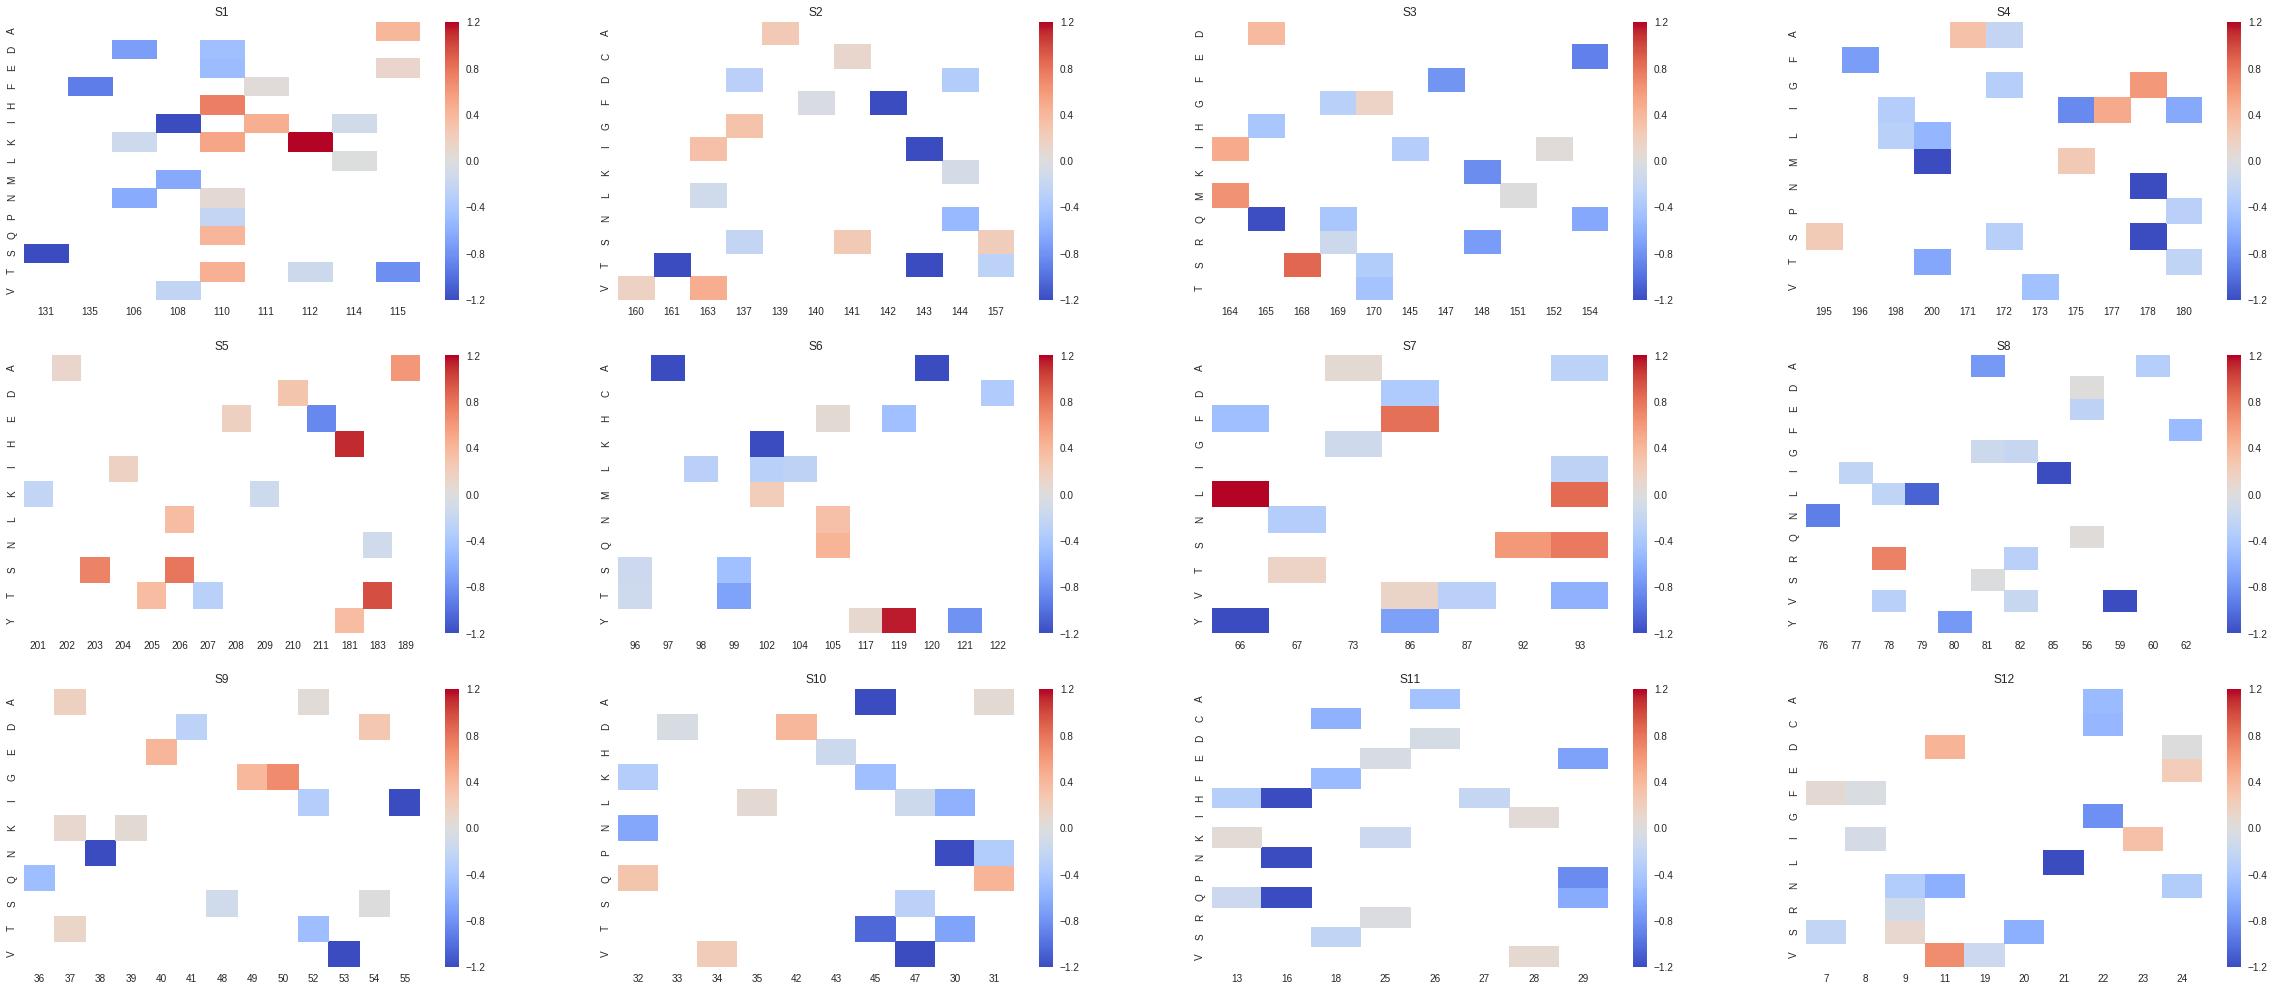

In [411]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    df = make_table(chunk)
    if chunk in ['S3','S4','S5','S8','S11']:
        df *= -1
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmin=-1., vmax=1.2)    
    
    count+=1

# 2. 2-neurons

In [417]:
for chunk in chunks:
    print (chunk)
    data, labels = read_data(chunk)
    
    model = Sequential()
    init = initializers.Orthogonal(gain=1.0, seed=None)

    model.add(Dense(2, input_dim=data.shape[1], activation='sigmoid', kernel_initializer=init))
    model.add(Dense(100, activation='sigmoid', kernel_initializer=init))
    model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

    opt = optimizers.RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)

    model.compile(optimizer=opt,
                  loss='mean_squared_error',
                  verbose=0)
    
    hist[chunk] = model.fit(data, labels, epochs=500, batch_size=500, shuffle=True, verbose=0)
    proba = model.predict_proba(data, batch_size=500, verbose=0)
    
    large_weights_1[chunk] = model.layers[0].get_weights()[0]
    large_weights_2[chunk] = model.layers[1].get_weights()[0]
    large_weights_3[chunk] = model.layers[2].get_weights()[0]
    
    large_biases_1[chunk] = model.layers[0].get_weights()[1]
    large_biases_2[chunk] = model.layers[1].get_weights()[1]
    large_biases_3[chunk] = model.layers[2].get_weights()[1]
    
    true[chunk] = labels
    predicted[chunk] = proba.flatten()
    fitness_potential[chunk] = data.dot(large_weights_1[chunk])

S1
S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12


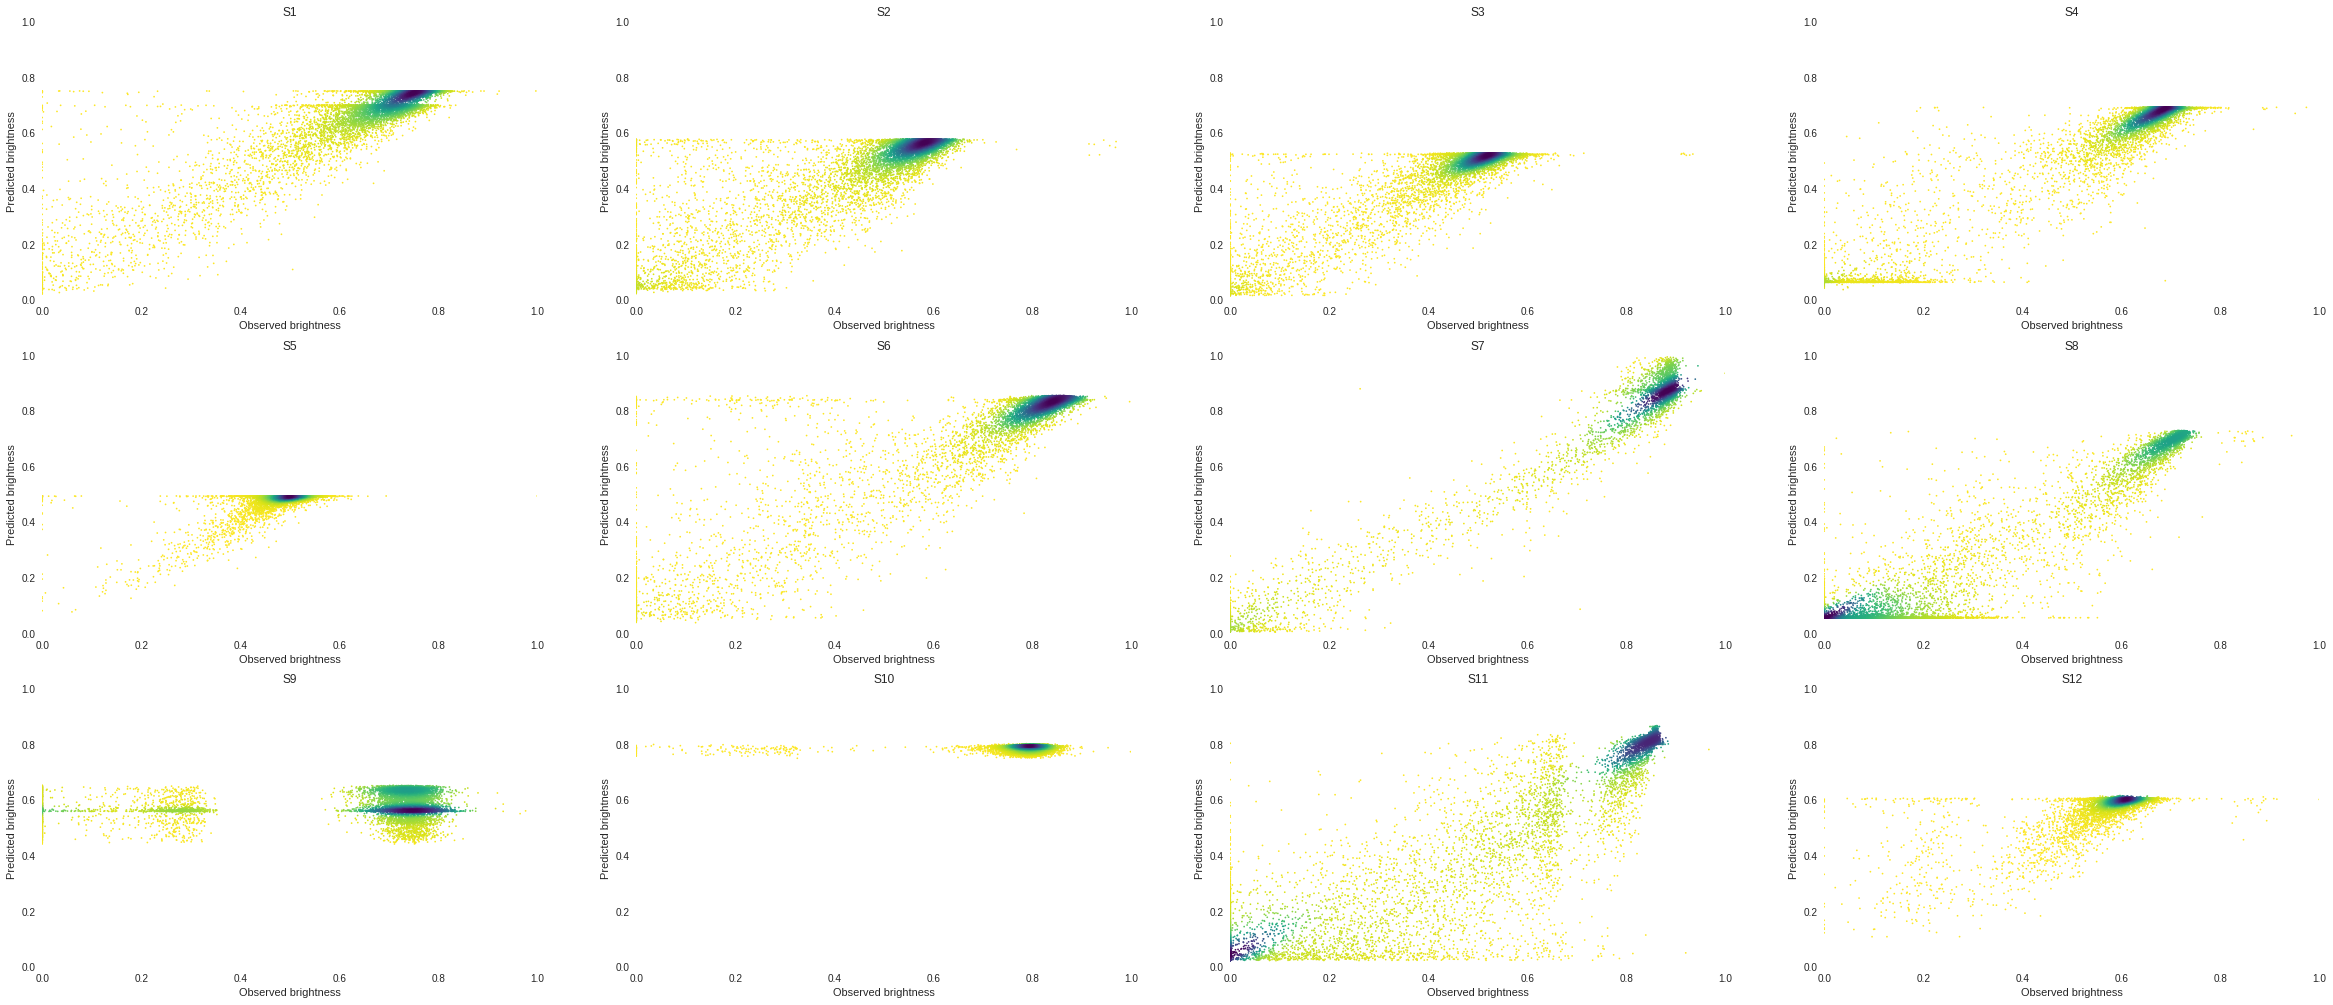

In [418]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)
    plt.ylim(0,1)
    plt.xlim(0,1)
    density_plot(true[chunk][:10000], predicted[chunk][:10000])
    count+=1

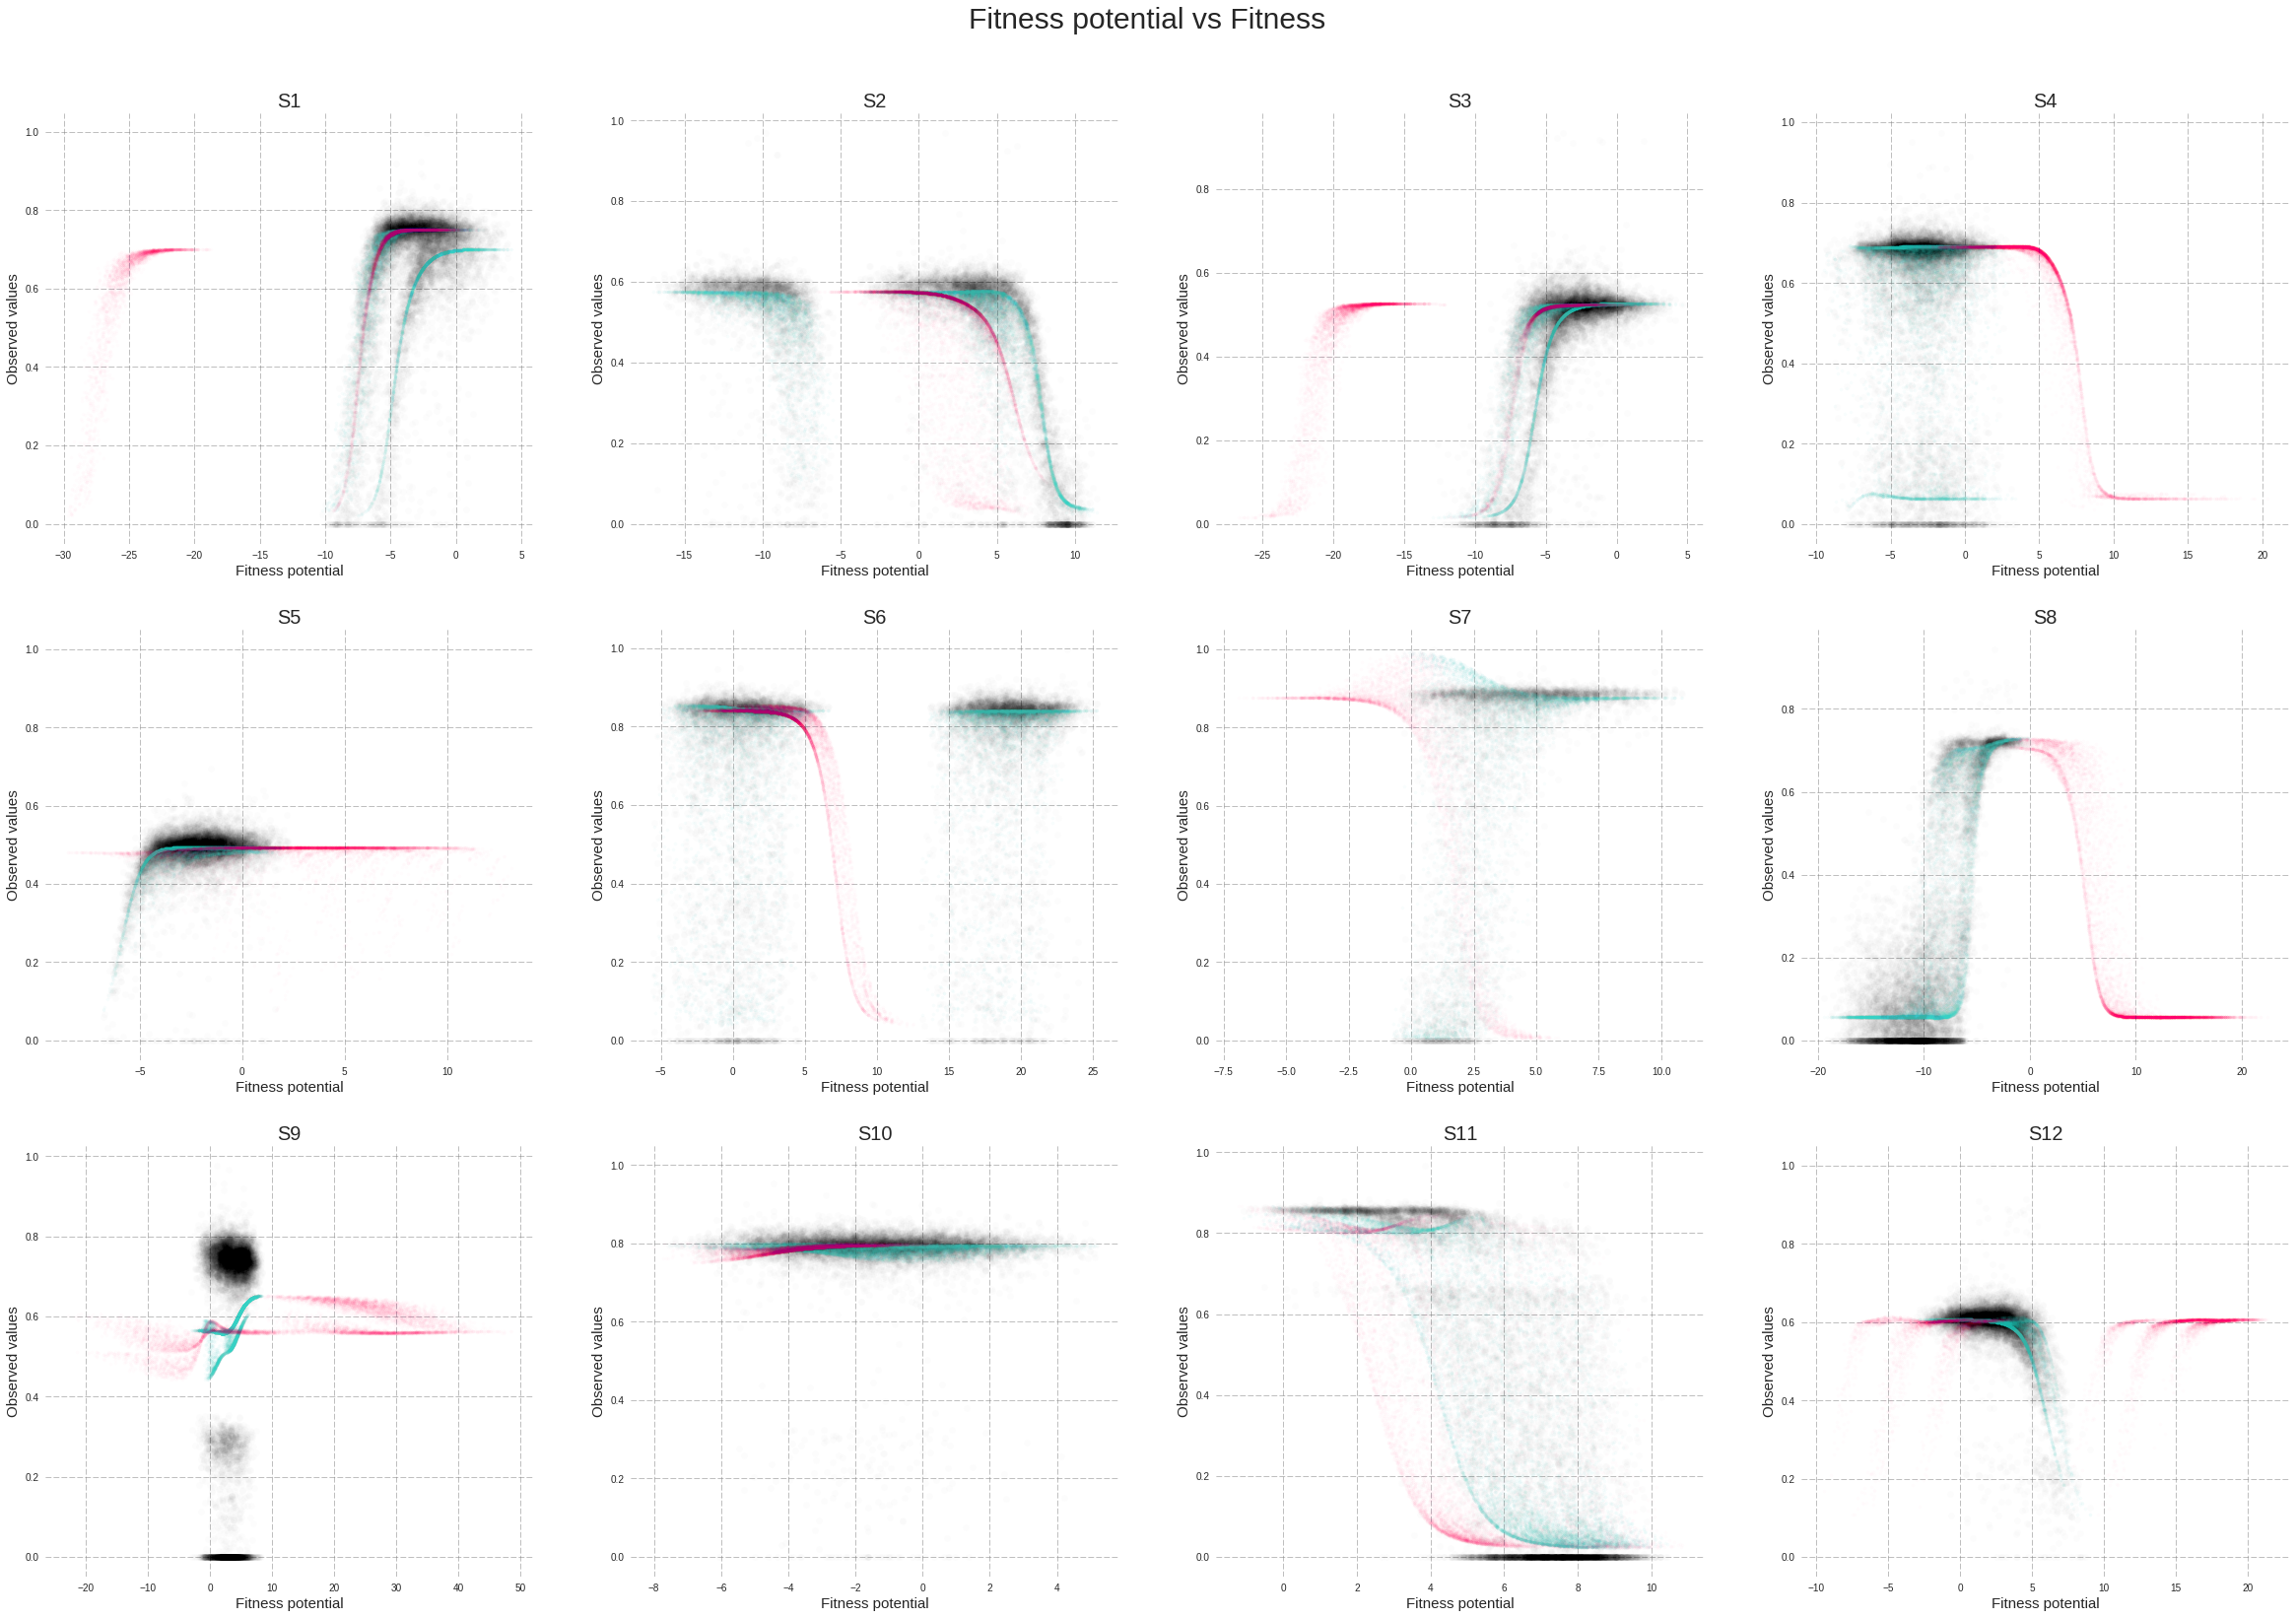

In [419]:
fitness_potential_plotting(0, num=2)

### 2.2. Checking correlations between the two sets of weights

In [422]:
r2 = {}

for chunk in chunks:
    slope, intercept, r_value, p_value, std_err = stats.linregress(large_weights_1[chunk][:,0],large_weights_1[chunk][:,1])
    r2[chunk] = r_value

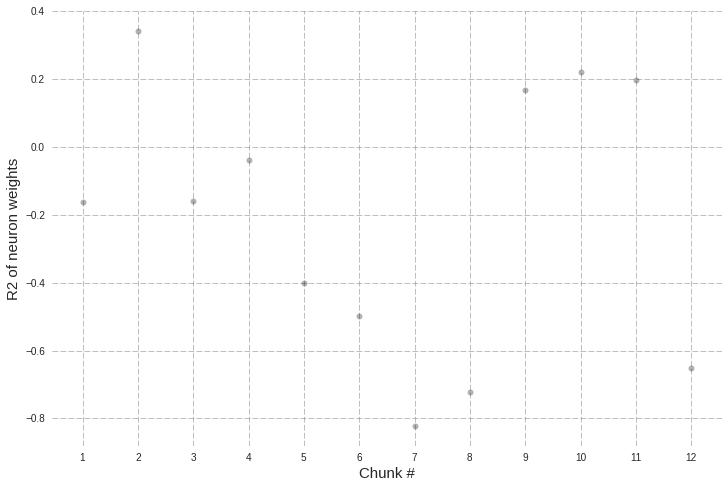

In [423]:
plt.figure(figsize=[12,8])
for i in range(1,13):
    y = r2['S'+str(i)]
    x = i
    plt.plot(x, y, 'k.', alpha=0.3, ms=12)
    plt.xticks([x for x in range(1,13)])
    plt.xlabel('Chunk #', fontsize=15)
    plt.ylabel('R2 of neuron weights', fontsize=15)
    plt.grid(True, ls='--', lw=0.5, dash_capstyle = 'round', c='gray')

# 3. Comparing weights

### 3.1. Comparing weights of 2-neurons and 1-neurons NN architectures

In [424]:
unique_mutations = {}
for chunk in chunks:
    input_file = '/home/katya/start/HIS3InterspeciesEpistasis/Analysis/Katya/NN/data/' + chunk + '.txt'
    data = pd.read_table(input_file)
    data.mut_list_Scer = data.mut_list_Scer.fillna('')
    unique_mutations[chunk] = set(':'.join(data.mut_list_Scer).split(':'))
    unique_mutations[chunk] = sorted(list(unique_mutations[chunk] ))
    if '' in unique_mutations[chunk]:
        unique_mutations[chunk] .remove('')

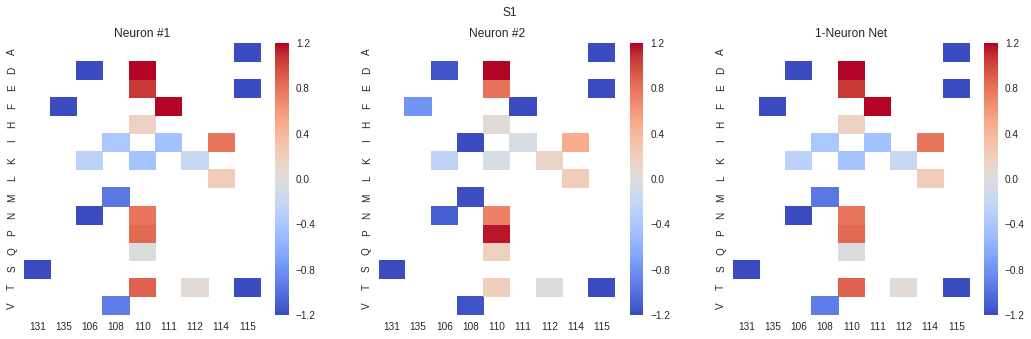

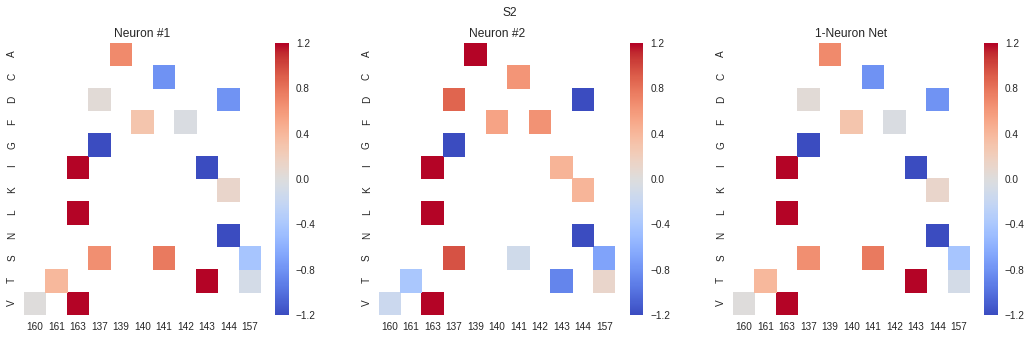

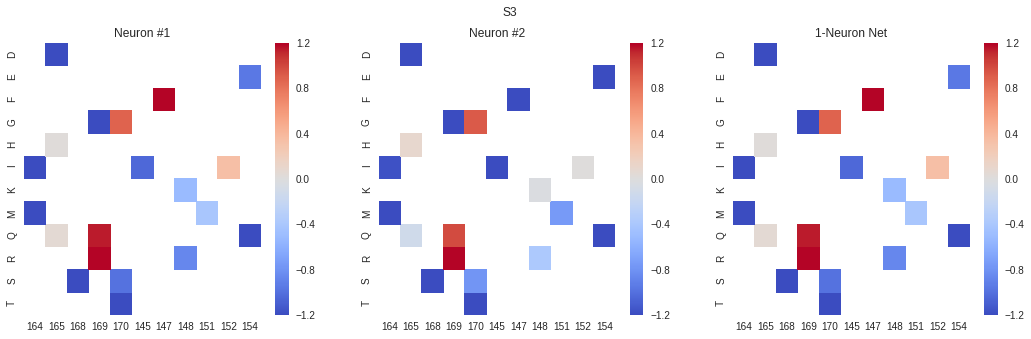

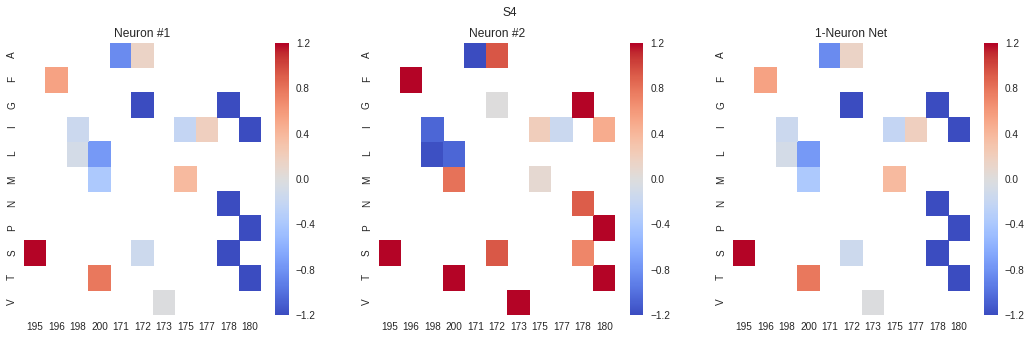

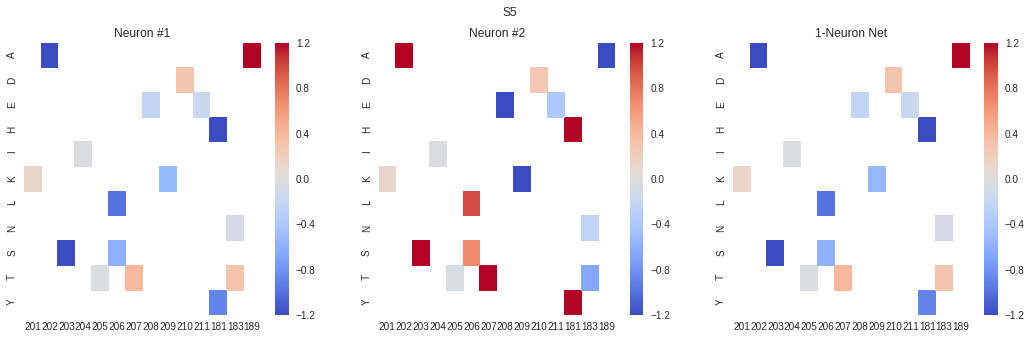

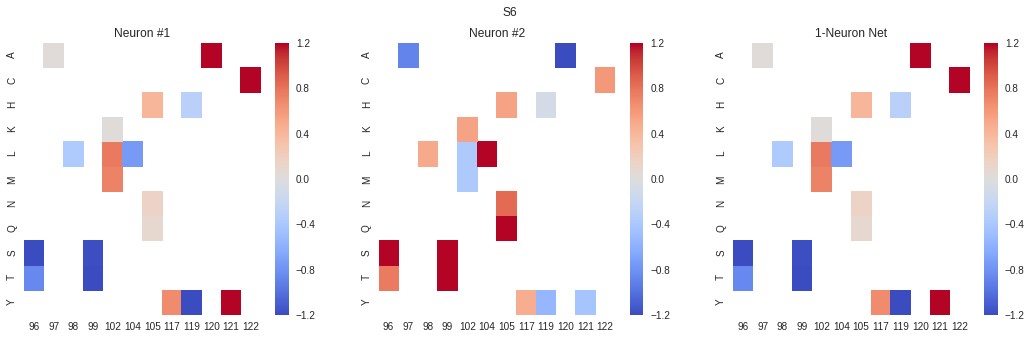

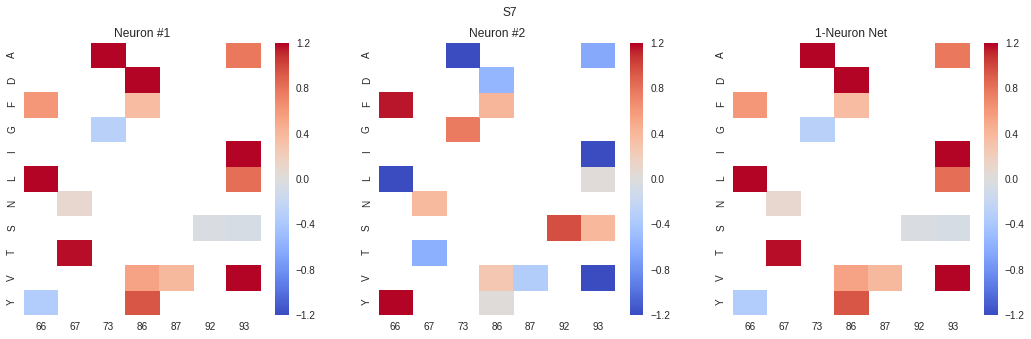

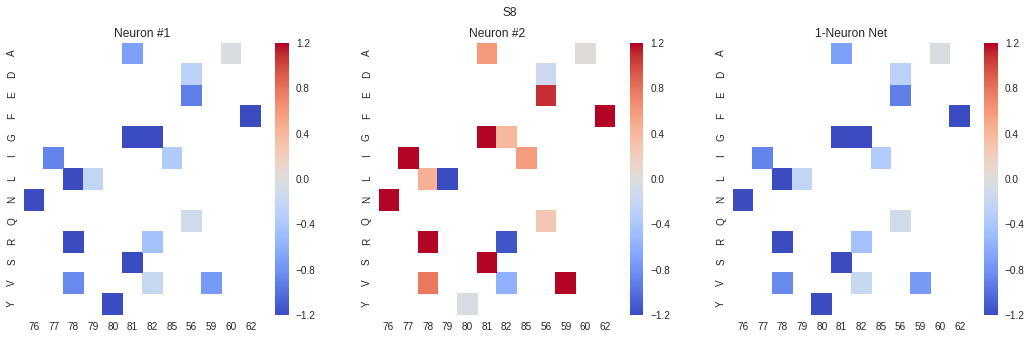

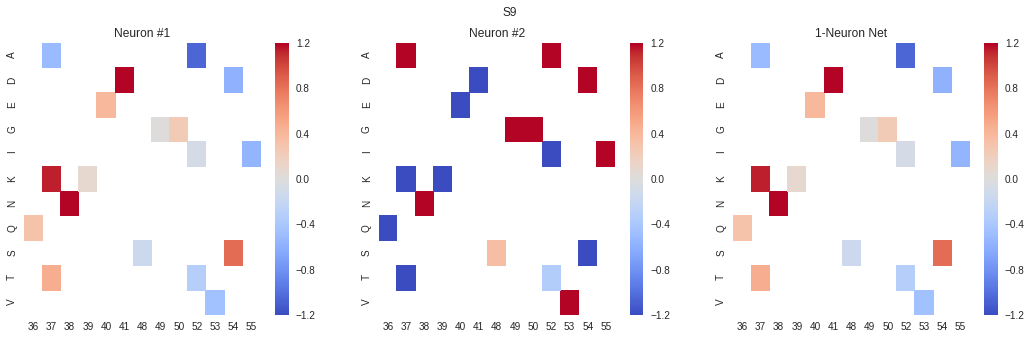

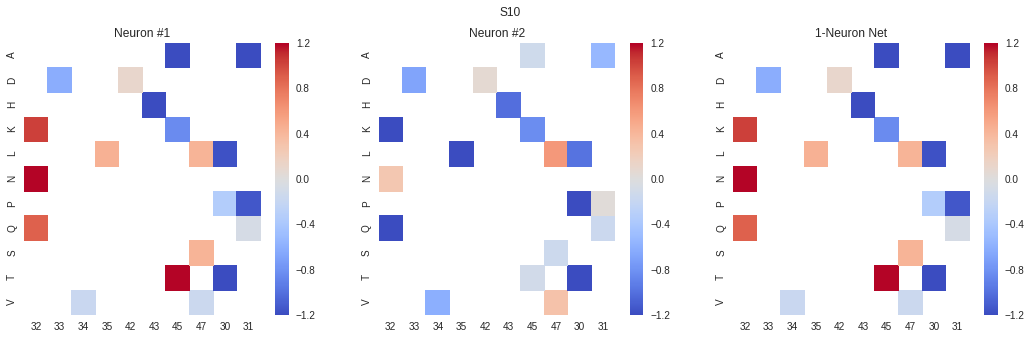

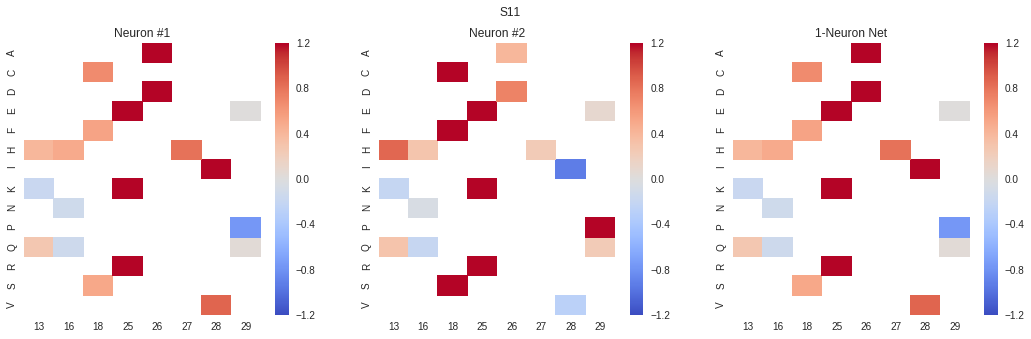

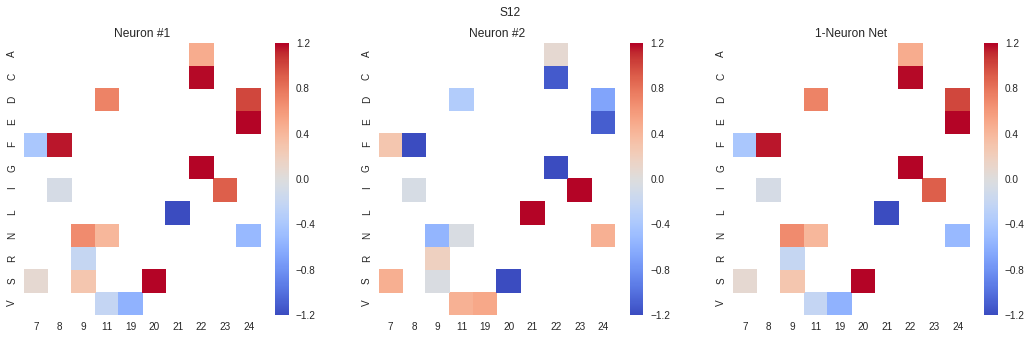

In [425]:
import seaborn as sns
plt.figure(figsize=(3*5+3,5))


for chunk in chunks: 
    plt.figure(figsize=(3*5+3,5))
    count=1
    
    for neuron in range(2):
        df = make_table(chunk, neuron)
        
        plt.subplot(1,3,count)
        sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmin=-1., vmax=1.2)
        plt.suptitle(chunk)
        plt.title('Neuron #%d' %(neuron+1));
        count+=1
        
    df = make_table(chunk)
    
    plt.subplot(1,3,3)    
    sns.heatmap(df, cmap='coolwarm', mask=df.isnull(), vmin=-1., vmax=1.2)
    plt.suptitle(chunk)
    plt.title('1-Neuron Net');

### 3.2. Zooming in on differences

In [426]:
differences = {}
result = {}

for chunk in chunks:
    df={}
    df[0] = make_table(chunk, neuron=0)
    df[1] = make_table(chunk, neuron=1)
    for key in df:
        df[key][df[key]>0]=1
        df[key][df[key]<0]=-1
    differences[chunk] = df[0] - df[1]
    differences[chunk]=differences[chunk].fillna(0)
    
    df[0] = make_table(chunk, neuron=0)
    df[1] = make_table(chunk, neuron=1)
    
    result[chunk] = (df[0][differences[chunk]!=0] - df[1][differences[chunk]!=0])

In [427]:
for chunk in chunks:
    print ('\n',chunk)
    for i in result[chunk].index:
        for j in result[chunk].columns:
            if result[chunk][j].ix[i]!=0:
                print (j,i,result[chunk][j].ix[i])


 S1
131 A nan
135 A nan
106 A nan
108 A nan
110 A nan
111 A nan
112 A nan
114 A nan
115 A nan
131 D nan
135 D nan
106 D nan
108 D nan
110 D nan
111 D nan
112 D nan
114 D nan
115 D nan
131 E nan
135 E nan
106 E nan
108 E nan
110 E nan
111 E nan
112 E nan
114 E nan
115 E nan
131 F nan
135 F nan
106 F nan
108 F nan
110 F nan
111 F 22.6431977749
112 F nan
114 F nan
115 F nan
131 H nan
135 H nan
106 H nan
108 H nan
110 H nan
111 H nan
112 H nan
114 H nan
115 H nan
131 I nan
135 I nan
106 I nan
108 I nan
110 I nan
111 I nan
112 I nan
114 I nan
115 I nan
131 K nan
135 K nan
106 K nan
108 K nan
110 K nan
111 K nan
112 K -0.313941538334
114 K nan
115 K nan
131 L nan
135 L nan
106 L nan
108 L nan
110 L nan
111 L nan
112 L nan
114 L nan
115 L nan
131 M nan
135 M nan
106 M nan
108 M nan
110 M nan
111 M nan
112 M nan
114 M nan
115 M nan
131 N nan
135 N nan
106 N nan
108 N nan
110 N nan
111 N nan
112 N nan
114 N nan
115 N nan
131 P nan
135 P nan
106 P nan
108 P nan
110 P nan
111 P nan
112 P nan
114

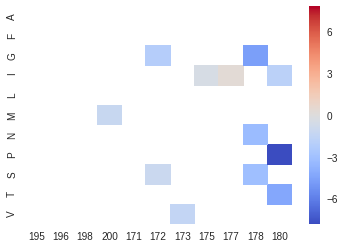

In [428]:
sns.heatmap(result['S4'], cmap='coolwarm')    

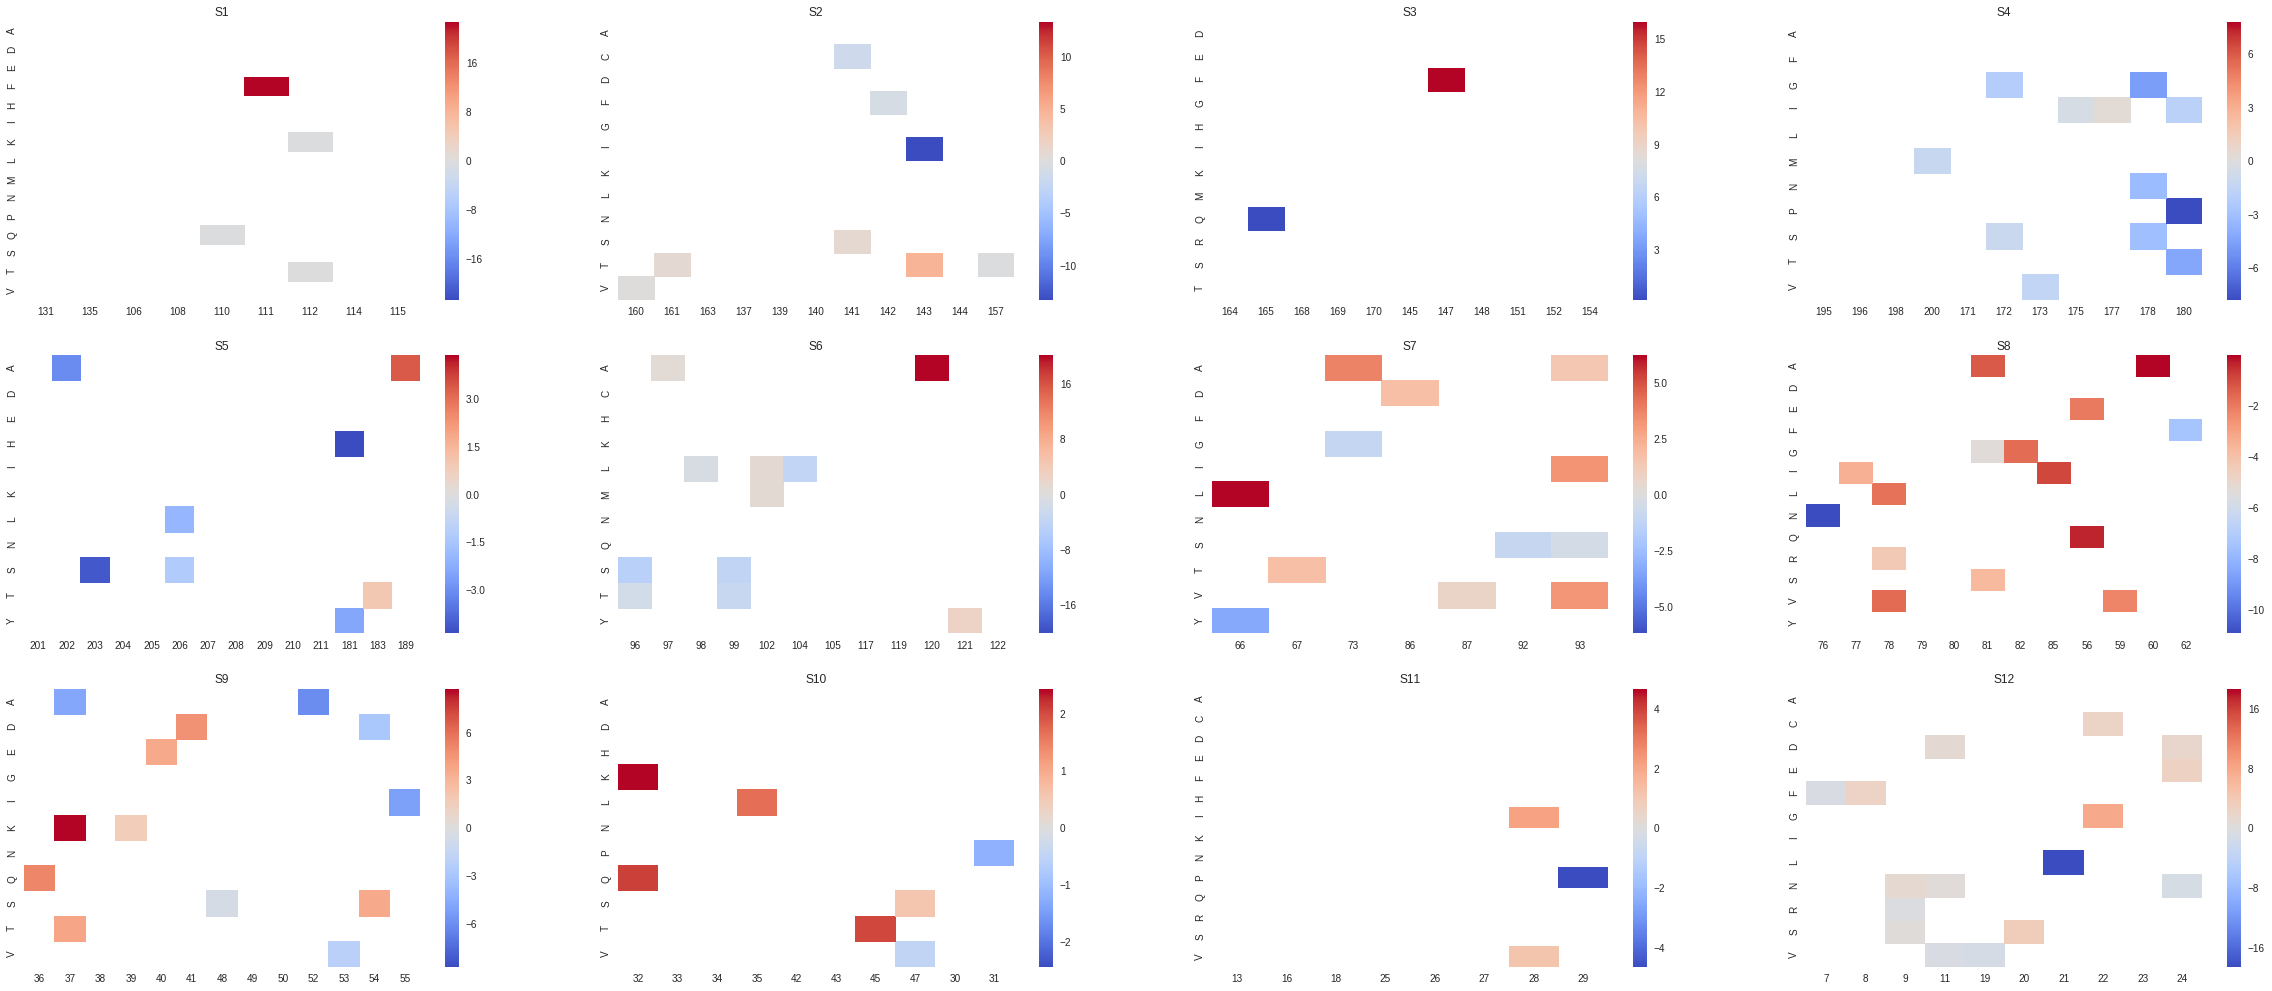

In [429]:
plt.figure(figsize=(4*5+3,3*5))
count=1
for chunk in chunks:
    plt.subplot(3,4,count)
    plt.subplots_adjust(top = 1,right=1.5)
    plt.title(chunk)

    sns.heatmap(result[chunk], cmap='coolwarm')    
    count+=1